BƯỚC 1: THÊM THƯ VIỆN VÀ TẬP DỮ LIỆU

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

insurance_df = pd.read_csv('insurance.csv')

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


BƯỚC 2: PHÂN TÍCH VÀ TRỰC QUAN HÓA TẬP DỮ LIỆU

In [10]:
#Xem một số thông tin về tập dữ liệu

insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Kiểm tra có giá trị NULL trong tập dữ liệu hay không?

insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Chuyển đổi dữ liệu sang dữ liệu số

insurance_df['sex'].unique()

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
insurance_df['smoker'].unique()

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [15]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [16]:
insurance_df.drop(['region'], axis = 1, inplace = True)

insurance_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


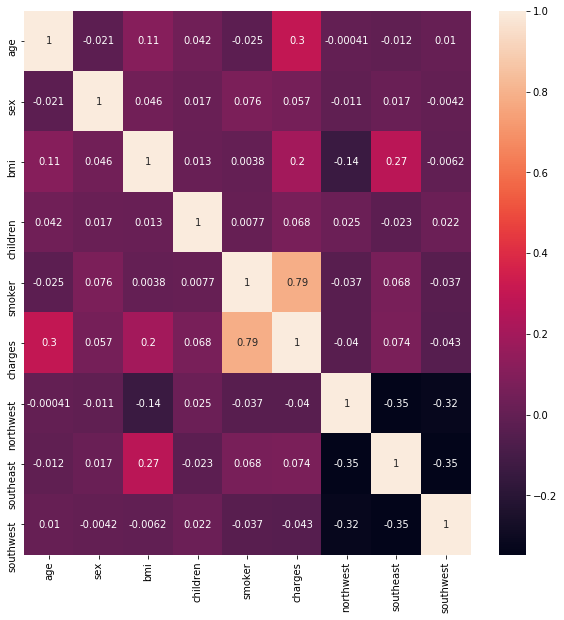

In [23]:
# Trực quan dữ liệu

corr = insurance_df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

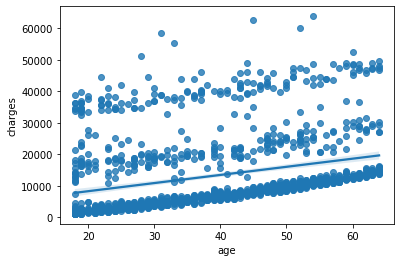

In [24]:
sns.regplot(x='age', y='charges', data=insurance_df)
plt.show()

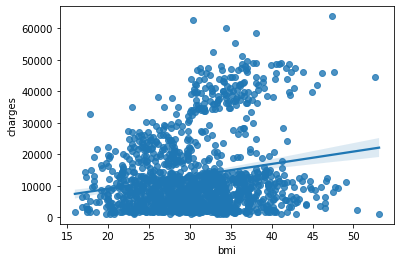

In [25]:
sns.regplot(x='bmi', y='charges', data=insurance_df)
plt.show()

In [26]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [27]:
# Gọi X là dữ liệu đầu vào, y là dữ liệu đầu ra

X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [30]:
X.shape

(1338, 8)

In [31]:
y.shape

(1338,)

In [33]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [34]:
y = y.reshape(-1,1)

y.shape

(1338, 1)

BƯỚC 3: TÁCH TẬP DỮ LIỆU THÀNH TẬP HUẤN LUYỆN VÀ TẬP KIỂM TRA

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
X_train.shape

(936, 8)

In [41]:
X_test.shape

(402, 8)

In [42]:
#Train
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7585295192349687

In [43]:
# Dự đoán thử

y_predict = regresssion_model_sklearn.predict(X_test)

y_predict

array([[ 1.44270654e+04],
       [ 9.60968652e+03],
       [ 1.28601670e+04],
       [ 1.26046631e+04],
       [ 2.60190938e+04],
       [ 3.11085664e+04],
       [ 3.37550117e+04],
       [ 1.64923750e+04],
       [ 1.21468018e+04],
       [ 3.92310508e+04],
       [ 4.92824707e+03],
       [ 9.70481934e+03],
       [ 3.79433164e+04],
       [ 3.28618477e+04],
       [ 1.02337920e+04],
       [ 2.56238477e+04],
       [ 3.37256445e+04],
       [ 1.68430664e+03],
       [ 1.07901143e+04],
       [ 6.55728223e+03],
       [ 3.02931758e+04],
       [ 3.16785273e+04],
       [ 2.49199141e+04],
       [ 1.05790811e+04],
       [ 7.86467676e+03],
       [ 1.02845186e+04],
       [ 9.82882324e+03],
       [ 5.37534473e+03],
       [ 3.29234180e+04],
       [ 3.10318555e+03],
       [ 9.38399512e+03],
       [ 1.63378906e+00],
       [ 6.19241309e+03],
       [ 1.04908662e+04],
       [ 4.24693164e+03],
       [ 1.01602451e+04],
       [ 6.21001465e+03],
       [ 1.42168389e+04],
       [ 2.6

BƯỚC 4: Train mô hình Linear Learner sử dụng SageMaker

In [44]:
import sagemaker
import boto3

# Tạo một phiên sagemaker
sagemaker_session = sagemaker.Session()

# Định nghĩa S3 bucket và thư mục con prefix
bucket = 'sagemaker-studio-727181768726-subniu90fo'
prefix = 'linear-model'

#Xác định IAM role
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::727181768726:role/LabRole


In [45]:
X_train.shape

(936, 8)

In [46]:
y_train.shape

(936, 1)

In [47]:
X_test.shape

(402, 8)

In [48]:
y_test.shape

(402, 1)

In [49]:
#Chuyển y_train và y_test sang dạng vector

y_train = y_train[:,0]
y_test = y_test[:,0]

In [50]:
y_train.shape

(936,)

In [51]:
y_test.shape

(402,)

In [52]:
# chuyển đổi dữ liệu training thành định dạng đầu vào tương thích với Sagemaker (RecordIO)

import io

import sagemaker.amazon.common as smac

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)

buf.seek(0)

0

In [53]:
# Tải dữ liệu lên S3 

import os

key = 'linear-model-data'

# tải dữ liệu ở định dạng record-io lên S3
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('Dữ liệu đã được tải lên tại: {}'.format(s3_train_data))


Dữ liệu đã được tải lên tại: s3://sagemaker-studio-727181768726-subniu90fo/linear-model/train/linear-model-data


In [54]:
# Tạo nơi để lưu trữ output

output_location = 's3://{}/{}/output'.format(bucket, prefix)

print("Output được lưu tại vị trí: {}".format(output_location))

Output được lưu tại vị trí: s3://sagemaker-studio-727181768726-subniu90fo/linear-model/output


In [55]:
# Tạo container và tên thuật toán để train

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [56]:
# Chuẩn bị trước khi training

linear = sagemaker.estimator.Estimator(container,
          role, 
          train_instance_count = 1, 
          train_instance_type = 'ml.c4.xlarge',
          output_path = output_location,
          sagemaker_session = sagemaker_session)

# Training mô hình với các tham số tùy chọn

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Training mô mình với dữ liệu từ S3

linear.fit({'train': s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-11-20 13:50:45 Starting - Starting the training job...
2021-11-20 13:51:11 Starting - Launching requested ML instancesProfilerReport-1637416245: InProgress
......
2021-11-20 13:52:11 Starting - Preparing the instances for training............
2021-11-20 13:54:12 Downloading - Downloading input data
2021-11-20 13:54:12 Training - Downloading the training image...
2021-11-20 13:54:45 Uploading - Uploading generated training model
2021-11-20 13:54:45 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/20/2021 13:54:32 INFO 139722216089408] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_

BƯỚC 5: TRIỂN KHAI MÔ HÌNH

In [69]:
linear_regressor = linear.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

---------!

In [59]:
# Kiểm tra 
# Chuyển dữ liệu sang dạng text/csv

from sagemaker.predictor import csv_serializer, json_deserializer

linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [60]:
result = linear_regressor.predict(X_test)

result

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 11428.431640625},
  {'score': 10293.044921875},
  {'score': 13296.986328125},
  {'score': 11989.4453125},
  {'score': 33655.54296875},
  {'score': 35843.34375},
  {'score': 40674.7734375},
  {'score': 14787.56640625},
  {'score': 12711.39453125},
  {'score': 41572.49609375},
  {'score': 3471.986328125},
  {'score': 9735.314453125},
  {'score': 43267.234375},
  {'score': 37217.76953125},
  {'score': 9815.46875},
  {'score': 31516.3984375},
  {'score': 37513.1015625},
  {'score': 2032.5068359375},
  {'score': 12553.49609375},
  {'score': 6793.5146484375},
  {'score': 36357.65625},
  {'score': 37902.546875},
  {'score': 29417.046875},
  {'score': 10285.7548828125},
  {'score': 8002.60546875},
  {'score': 9370.8623046875},
  {'score': 9544.150390625},
  {'score': 5865.458984375},
  {'score': 36784.421875},
  {'score': 2750.80517578125},
  {'score': 8343.775390625},
  {'score': 160.068359375},
  {'score': 4253.82421875},
  {'score': 9018.109375},
  {'score': 4123.

In [61]:
predictions = np.array([r['score'] for r in result['predictions']])

predictions

array([11428.43164062, 10293.04492188, 13296.98632812, 11989.4453125 ,
       33655.54296875, 35843.34375   , 40674.7734375 , 14787.56640625,
       12711.39453125, 41572.49609375,  3471.98632812,  9735.31445312,
       43267.234375  , 37217.76953125,  9815.46875   , 31516.3984375 ,
       37513.1015625 ,  2032.50683594, 12553.49609375,  6793.51464844,
       36357.65625   , 37902.546875  , 29417.046875  , 10285.75488281,
        8002.60546875,  9370.86230469,  9544.15039062,  5865.45898438,
       36784.421875  ,  2750.80517578,  8343.77539062,   160.06835938,
        4253.82421875,  9018.109375  ,  4123.26464844, 10277.37109375,
        5129.21582031, 11138.86035156, 32508.80859375,  2128.74951172,
        4225.00195312,  4168.2890625 ,  9024.61425781,  5785.03320312,
       15999.55664062, 13745.046875  , 36750.74609375,  5103.0546875 ,
       41335.1015625 , 10384.00976562, 37607.3359375 ,  8490.109375  ,
        2114.88476562,  1676.48339844, 11178.37304688,  7210.87109375,
      

In [62]:
# Kiểm tra kết quả 

df = pd.DataFrame({'Thực tế': y_test.flatten(), 'Dự đoán': predictions.flatten()})

df

,Thực tế,Dự đoán
0,10601.412109,11428.431641
1,8547.691406,10293.044922
2,12105.320312,13296.986328
3,10564.884766,11989.445312
4,15006.579102,33655.542969
...,...,...
397,10965.446289,10555.230469
398,5438.749023,7752.345703
399,12557.605469,12258.828125
400,3875.734131,5845.537109


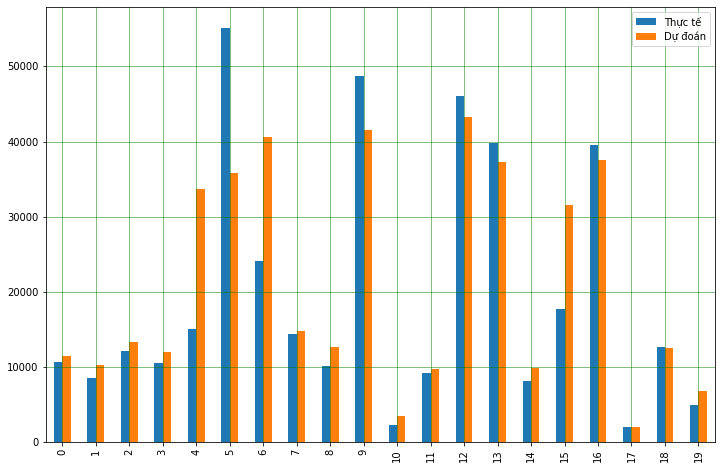

In [63]:
df1 = df.head(20)

df1.plot(kind='bar',figsize=(12,8))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

In [67]:
# Xóa end-point

linear_regressor.delete_endpoint()